In [84]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler

In [85]:
data = load_iris()

In [86]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [87]:
print(data.DESCR)  # data

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [88]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [89]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [90]:
df["target"]=data.target

In [91]:
df # 0:setosa, 1:versicolor, 2:virginica

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [93]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [94]:
# descriptive statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [95]:
#Dataset is balanced or imbalanced check for classicfication problems
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [96]:
df_copy=df[df['target']!=2]
df_copy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [97]:
df_copy.shape

(100, 5)

In [98]:
df_copy['target'].value_counts()

target
0    50
1    50
Name: count, dtype: int64

In [99]:
# split the dataset into Input and Output variables
X=df_copy.drop(['target'],axis=1) #input
y=df_copy['target'] #output

In [100]:
# split the X, y into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [101]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 4), (20, 4), (80,), (20,))

In [102]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
83,6.0,2.7,5.1,1.6
53,5.5,2.3,4.0,1.3
70,5.9,3.2,4.8,1.8
45,4.8,3.0,1.4,0.3
44,5.1,3.8,1.9,0.4
39,5.1,3.4,1.5,0.2
22,4.6,3.6,1.0,0.2
80,5.5,2.4,3.8,1.1
10,5.4,3.7,1.5,0.2
0,5.1,3.5,1.4,0.2


In [103]:
scaler=StandardScaler()

In [104]:
train_sc=scaler.fit_transform(X_train)

In [105]:
X_train['sepal length (cm)'].std()

0.6542896428256073

In [106]:
X_test_sc=scaler.transform(X_test)

In [107]:
# create an object for LogisticRegression
lr=LogisticRegression()

In [108]:
lr.fit(train_sc,y_train)  # train the model

LogisticRegression()

In [109]:
y_pred=lr.predict(X_test_sc)

In [110]:
y_pred_proba=lr.predict_proba(X_test_sc)


In [111]:
y_pred_proba

array([[0.00178063, 0.99821937],
       [0.00919542, 0.99080458],
       [0.0050349 , 0.9949651 ],
       [0.95911656, 0.04088344],
       [0.97862929, 0.02137071],
       [0.97937036, 0.02062964],
       [0.9957446 , 0.0042554 ],
       [0.02389942, 0.97610058],
       [0.98483429, 0.01516571],
       [0.98511337, 0.01488663],
       [0.9722227 , 0.0277773 ],
       [0.96902585, 0.03097415],
       [0.00865404, 0.99134596],
       [0.99500814, 0.00499186],
       [0.01562883, 0.98437117],
       [0.9894865 , 0.0105135 ],
       [0.00193372, 0.99806628],
       [0.00126087, 0.99873913],
       [0.97562424, 0.02437576],
       [0.95046442, 0.04953558]])

In [112]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [113]:
cfm=confusion_matrix(y_test,y_pred)
print(cfm)

[[12  0]
 [ 0  8]]


In [114]:
df_cm = pd.DataFrame(cfm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
df_cm

,Predicted 0,Predicted 1
Actual 0,12,0
Actual 1,0,8


In [115]:
false_positives = df_cm.loc['Actual 0', 'Predicted 1']
false_positives

0

In [116]:
false_negatives = df_cm.loc['Actual 1', 'Predicted 0']
false_negatives

0

In [117]:
accuracy_score(y_test,y_pred)

1.0

In [118]:
precision_score(y_test,y_pred)

1.0

In [119]:
recall_score(y_test,y_pred)

1.0

In [120]:
f1_score(y_test,y_pred)

1.0

In [121]:
import pickle

In [122]:
pickle.dump(scaler,open('iris_scaler.pkl','wb'))
pickle.dump(lr,open('iris_lr.pkl','wb'))

In [123]:
# ovr: one vs. rest

In [124]:
X=df.drop(['target'],axis=1) #input
y=df['target'] #output

<Axes: >

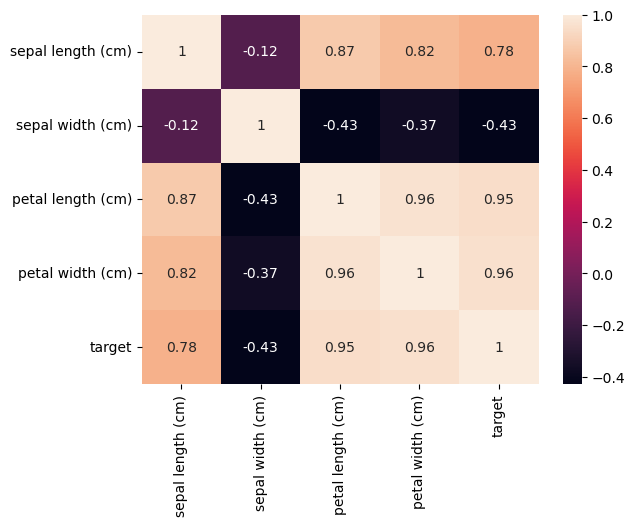

In [125]:
sns.heatmap(df.corr(), annot=True)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [127]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [128]:
X_train_sc=scaler.fit_transform(X_train)

In [129]:
X_test_sc=scaler.transform(X_test)

In [130]:
lr=LogisticRegression(multi_class='ovr', solver='lbfgs')

In [131]:
lr.fit(X_train_sc,y_train)

LogisticRegression(multi_class='ovr')

In [132]:
y_pred=lr.predict(X_test_sc)

In [133]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [134]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [135]:
lr.predict_proba(X_test_sc)

array([[1.83992522e-02, 7.97408898e-01, 1.84191850e-01],
       [9.45180928e-01, 5.48007650e-02, 1.83069057e-05],
       [8.10885543e-06, 4.18056155e-01, 5.81935736e-01],
       [1.95173870e-02, 6.16591648e-01, 3.63890965e-01],
       [3.83516162e-03, 6.56384980e-01, 3.39779858e-01],
       [8.81076870e-01, 1.18889900e-01, 3.32303470e-05],
       [1.51979189e-01, 7.64389111e-01, 8.36317002e-02],
       [6.79586072e-04, 1.83799948e-01, 8.15520466e-01],
       [1.19016658e-03, 6.40816034e-01, 3.57993799e-01],
       [4.81759668e-02, 8.67949700e-01, 8.38743330e-02],
       [3.16612343e-03, 1.99290551e-01, 7.97543326e-01],
       [7.42825450e-01, 2.57162378e-01, 1.21723146e-05],
       [8.94802271e-01, 1.05187400e-01, 1.03296274e-05],
       [7.71666311e-01, 2.28320969e-01, 1.27208376e-05],
       [9.56942257e-01, 4.30454433e-02, 1.22995076e-05],
       [3.68630043e-02, 3.96848153e-01, 5.66288842e-01],
       [4.82223402e-04, 2.38432655e-01, 7.61085122e-01],
       [3.67826412e-02, 9.02158

In [136]:
precision_score(y_test,y_pred, average='macro')

0.9722222222222222

In [137]:
precision_score(y_test,y_pred, average='macro')

0.9722222222222222

In [138]:
recall_score(y_test,y_pred, average='macro')

0.9629629629629629

In [139]:
from sklearn.datasets import load_breast_cancer

In [140]:
data = load_breast_cancer()

In [141]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [142]:
bc=pd.DataFrame(data.data,columns=data.feature_names)

In [143]:
bc['target']=data.target

In [144]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [145]:
bc['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [146]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [147]:
bc.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [148]:
bc.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [149]:
X=bc.drop(['target'],axis=1)
y=bc['target']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [151]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [152]:
X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)

In [153]:
lr=LogisticRegression()

In [154]:
lr.fit(X_train_sc,y_train)

LogisticRegression()

In [155]:
y_pred=lr.predict(X_test_sc)

In [156]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[41,  2],
       [ 1, 70]], dtype=int64)

In [157]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [158]:
precision_score(y_test,y_pred)

0.9722222222222222

In [159]:
recall_score(y_test,y_pred)

0.9859154929577465

In [160]:
f1_score(y_test,y_pred)

0.979020979020979